# Using Data Sources

Now let's add which source of images we would like to use. Possible are sources are: [Mapillary](https://www.mapillary.com/), [Kartaview](https://kartaview.org/), and [Amsterdam Open Panorama](https://amsterdam.github.io/projects/open-panorama/). 

It is also possible to use [Global Streetscapes](https://ual.sg/project/global-streetscapes/) as a data source. However, as it is a fundamentally different type of dataset, a separate tutorial can be found [here]() 

<span style="color:red;">NOTE</span>: Make sure you have the appropriate API keys stored in your `.env` file. 

In [6]:
import warnings
warnings.filterwarnings("ignore")

import geopandas as gpd
import contextily

import numpy as np
from matplotlib import pyplot as plt

from streetscapes.sources import Mapillary, KartaView, AmsterdamPanorama
from streetscapes.streetview import SVWorkspace

In [7]:
ws = SVWorkspace("./Amsterdam", create=True)

### Mapillary

In [8]:
mp = Mapillary(ws.env)
mp

Mapillary(root_dir='~/.cache/huggingface/assets/streetscapes/images/mapillary')

To test that the connection to our data sources work, we can get the image URLs for a KartaView and a Mapillary image:

In [9]:
mp_img_url = mp.get_image_url("4911230068985425")
mp_img_url

'https://scontent-lhr8-2.xx.fbcdn.net/m1/v/t6/An--rrF4WlM05JH5SMiWxbdSXVWL0mFEymquJWW0EmSjaBemmKBcF8DRGqIe8akNayRiH0VTYunIfeHZlt2zAGA0sYkEkeWIUtnfp27cgiCen37fra1_v0gwTJFgNL5wTiUGkS7F56f_yLBZF1HqZg?stp=s2048x1536&edm=ALXxkZ8EAAAA&_nc_gid=UkiRrdnY8ABrK9AtyrOU6Q&_nc_oc=AdlJdHsbR6M1yfux3VoFFkQvjWXEKhhaq2CVd2BVIF8bMrbHCFZGrI5gNyTfori3J88&ccb=10-5&oh=00_AfLp7GokgQkBeg6o09oJG4JaNdAYonqVO3PS5O0fUGrusw&oe=686421BC&_nc_sid=201bca'

In [10]:
bbox = [4.879990,52.368023,4.892499,52.374656]
df = mp.fetch_image_ids(bbox=bbox)

In [11]:
pdf = df.to_pandas()
gdf = gpd.GeoDataFrame(pdf, geometry=gpd.points_from_xy(pdf.lon, pdf.lat))
gdf.set_crs("EPSG:4326", allow_override=True, inplace=True)
gdf.head(5)

,id,altitude,atomic_scale,camera_type,captured_at,compass_angle,computed_altitude,computed_compass_angle,computed_geometry,computed_rotation,...,make,model,thumb_256_url,thumb_1024_url,thumb_2048_url,thumb_original_url,sequence,width,lon,lat
0,5067957103241204,3.354955,1.007539,fisheye,1651505888329,278.730241,-3.969839,275.900243,"{'coordinates': [4.8850446993653, 52.374012366...","[1.0194904950851, 0.96364358657192, -1.2014773...",...,Blackvue,DR900S-1CH,https://scontent-lhr8-2.xx.fbcdn.net/m1/v/t6/A...,https://scontent-lhr8-2.xx.fbcdn.net/m1/v/t6/A...,https://scontent-lhr8-2.xx.fbcdn.net/m1/v/t6/A...,https://scontent-lhr8-2.xx.fbcdn.net/m1/v/t6/A...,1fC9njE4AqrWx2ha5gmvBz,3840,4.885045,52.374012
1,2031165817059491,46.843073,1.001202,equirectangular,1471334373903,0.000000,2.346889,359.790204,"{'coordinates': [4.883316759493, 52.3739033580...","[1.5772736048257, 0.00096669956146718, -0.0047...",...,Trimble,Trimble TMX,https://scontent-lhr8-2.xx.fbcdn.net/m1/v/t6/A...,https://scontent-lhr8-2.xx.fbcdn.net/m1/v/t6/A...,https://scontent-lhr8-2.xx.fbcdn.net/m1/v/t6/A...,https://scontent-lhr8-2.xx.fbcdn.net/m1/v/t6/A...,cH5KuVeZ1XmIENYG4bvHQA,8000,4.883317,52.373903
2,1425765514854153,55.953000,1.017134,fisheye,1683039840000,74.250417,1.373042,62.345795,"{'coordinates': [4.8802345039287, 52.371387649...","[1.3522883459061, -0.76400462294776, 0.9209075...",...,GoPro,HERO7 Black,https://scontent-lhr8-2.xx.fbcdn.net/m1/v/t6/A...,https://scontent-lhr8-2.xx.fbcdn.net/m1/v/t6/A...,https://scontent-lhr8-2.xx.fbcdn.net/m1/v/t6/A...,https://scontent-lhr8-2.xx.fbcdn.net/m1/v/t6/A...,RptNah3J6z7lT2AE0dQb58,4000,4.880235,52.371388
3,1475390959888608,47.616000,1.143393,fisheye,1687891996000,31.710000,1.197597,5.016132,"{'coordinates': [4.8851197455247, 52.371607035...","[1.4072375950993, -0.08337832279889, 0.0470142...",...,GoPro,HERO7 Black,https://scontent-lhr8-2.xx.fbcdn.net/m1/v/t6/A...,https://scontent-lhr8-2.xx.fbcdn.net/m1/v/t6/A...,https://scontent-lhr8-2.xx.fbcdn.net/m1/v/t6/A...,https://scontent-lhr8-2.xx.fbcdn.net/m1/v/t6/A...,oXQ6V8KOYsrj3yfqUG1a2e,4000,4.885120,52.371607
4,2826903340894023,47.614477,0.998144,equirectangular,1471418479710,0.000000,2.271393,359.879806,"{'coordinates': [4.8816030856064, 52.371516798...","[1.5679503218982, 0.0069409817955733, 0.003662...",...,Trimble,Trimble TMX,https://scontent-lhr8-2.xx.fbcdn.net/m1/v/t6/A...,https://scontent-lhr8-2.xx.fbcdn.net/m1/v/t6/A...,https://scontent-lhr8-2.xx.fbcdn.net/m1/v/t6/A...,https://scontent-lhr8-2.xx.fbcdn.net/m1/v/t6/A...,gvfkHga6n7wPlTzlvq7rkQ,8000,4.881603,52.371517


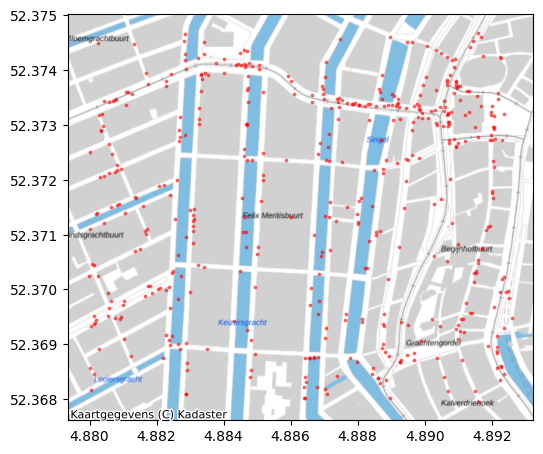

In [12]:
ax = gdf.plot(column='uuid', color='red', markersize=3, figsize=(6, 6), alpha=0.5)
contextily.add_basemap(ax, crs=gdf.crs, source=contextily.providers.nlmaps.standaard)

### Kartaview

In [13]:
kv = KartaView(ws.env)
kv

KartaView(root_dir='~/.cache/huggingface/assets/streetscapes/images/kartaview')

In [14]:
kv_img_url = kv.get_image_url("1208524")
kv_img_url

In [15]:
df = kv.fetch_image_ids(52.3723032, 4.8877233, 500)

In [16]:
pdf = df.to_pandas()
gdf = gpd.GeoDataFrame(pdf, geometry=gpd.points_from_xy(pdf.lng, pdf.lat))
gdf.set_crs("EPSG:4326", allow_override=True, inplace=True)
gdf.head(5)

,id,sequence_id,sequence_index,orgCode,lat,lng,field_of_view,name,lth_name,th_name,...,match_lat,match_lng,way_id,shot_date,heading,headers,gps_accuracy,projection,username,geometry
0,1605307145,6072841,5218,CMNT,52.369301,4.892199,None,storage13/files/photo/2022/9/10/proc/6072841_5...,storage13/files/photo/2022/9/10/lth/6072841_58...,storage13/files/photo/2022/9/10/th/6072841_58a...,...,None,None,None,2022-08-20 09:29:56.000,15.18,None,None,PLANE,madflex,POINT (4.8922 52.3693)
1,1605307401,6072841,5233,CMNT,52.370079,4.892559,None,storage13/files/photo/2022/9/10/proc/6072841_6...,storage13/files/photo/2022/9/10/lth/6072841_6b...,storage13/files/photo/2022/9/10/th/6072841_6b4...,...,52.370079040527344,4.892553806304932,7371712,2022-08-20 09:30:12.000,190.80,None,None,PLANE,madflex,POINT (4.89256 52.37008)
2,1605307657,6072841,5247,CMNT,52.370702,4.892724,None,storage13/files/photo/2022/9/10/proc/6072841_6...,storage13/files/photo/2022/9/10/lth/6072841_64...,storage13/files/photo/2022/9/10/th/6072841_64d...,...,52.370700836181640,4.892742156982422,7371712,2022-08-20 09:30:26.000,13.72,None,None,PLANE,madflex,POINT (4.89272 52.3707)
3,1605307913,6072841,5265,CMNT,52.371511,4.892822,None,storage13/files/photo/2022/9/10/proc/6072841_b...,storage13/files/photo/2022/9/10/lth/6072841_bc...,storage13/files/photo/2022/9/10/th/6072841_bc3...,...,52.371509552001950,4.892897129058838,7371712,2022-08-20 09:30:44.000,5.43,None,None,PLANE,madflex,POINT (4.89282 52.37151)
4,1605308169,6072841,5280,CMNT,52.372230,4.892816,None,storage13/files/photo/2022/9/10/proc/6072841_d...,storage13/files/photo/2022/9/10/lth/6072841_d3...,storage13/files/photo/2022/9/10/th/6072841_d32...,...,52.372226715087890,4.892929077148438,7371712,2022-08-20 09:30:59.000,3.38,None,None,PLANE,madflex,POINT (4.89282 52.37223)


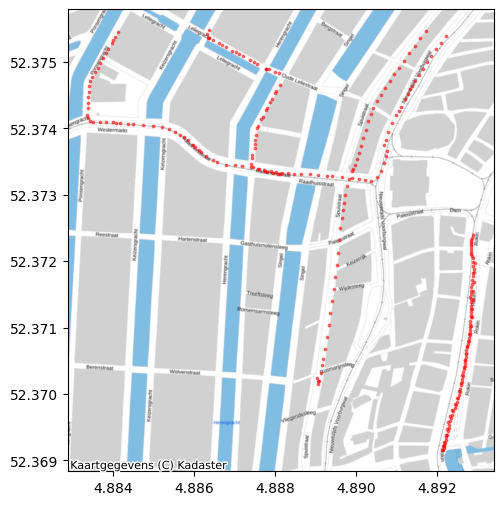

In [17]:
ax = gdf.plot(column='uuid', color='red', markersize=3, figsize=(6, 6), alpha=0.5)
contextily.add_basemap(ax, crs=gdf.crs, source=contextily.providers.nlmaps.standaard)

### Amsterdam Open Panorama

In [18]:
aop = AmsterdamPanorama(ws.env)

In [27]:
df = aop.fetch_image_ids(52.3723032, 4.8877233, 100)

In [28]:
pdf = df.to_pandas()
gdf = gpd.GeoDataFrame(pdf, geometry=gpd.points_from_xy(pdf.lon, pdf.lat))
gdf.set_crs("EPSG:4326", allow_override=True, inplace=True)
gdf.head(5)

,pano_id,timestamp,lon,lat,height,heading,roll,pitch,thumbnail_url,cubic_img_baseurl,cubic_img_pattern,equirectangular_full,geometry
0,TMX7316010203-002865_pano_0017_000042,2022-12-15T12:25:13.423810Z,4.887726,52.372259,46.602516,95.884121,-0.422495,-0.740015,https://api.data.amsterdam.nl/panorama/thumbna...,https://t1.data.amsterdam.nl/panorama/2022/12/...,https://t1.data.amsterdam.nl/panorama/2022/12/...,https://t1.data.amsterdam.nl/panorama/2022/12/...,POINT (4.88773 52.37226)
1,TMX7316010203-002865_pano_0017_000043,2022-12-15T12:25:14.593580Z,4.887660,52.372261,46.607472,95.102385,0.269215,-0.316865,https://api.data.amsterdam.nl/panorama/thumbna...,https://t1.data.amsterdam.nl/panorama/2022/12/...,https://t1.data.amsterdam.nl/panorama/2022/12/...,https://t1.data.amsterdam.nl/panorama/2022/12/...,POINT (4.88766 52.37226)
2,TMX7316010203-002865_pano_0017_000041,2022-12-15T12:25:12.368630Z,4.887793,52.372256,46.606823,95.415160,-1.313683,-0.901538,https://api.data.amsterdam.nl/panorama/thumbna...,https://t1.data.amsterdam.nl/panorama/2022/12/...,https://t1.data.amsterdam.nl/panorama/2022/12/...,https://t1.data.amsterdam.nl/panorama/2022/12/...,POINT (4.88779 52.37226)
3,TMX7316010203-002537_pano_0001_000805,2022-04-22T08:32:02.226790Z,4.887712,52.372234,46.982223,274.629359,0.458672,-0.064371,https://api.data.amsterdam.nl/panorama/thumbna...,https://t1.data.amsterdam.nl/panorama/2022/04/...,https://t1.data.amsterdam.nl/panorama/2022/04/...,https://t1.data.amsterdam.nl/panorama/2022/04/...,POINT (4.88771 52.37223)
4,TMX7316010203-002445_pano_0002_000021,2022-01-27T08:40:48.378890Z,4.887696,52.372231,46.446957,95.441268,1.141474,-0.285900,https://api.data.amsterdam.nl/panorama/thumbna...,https://t1.data.amsterdam.nl/panorama/2022/01/...,https://t1.data.amsterdam.nl/panorama/2022/01/...,https://t1.data.amsterdam.nl/panorama/2022/01/...,POINT (4.8877 52.37223)


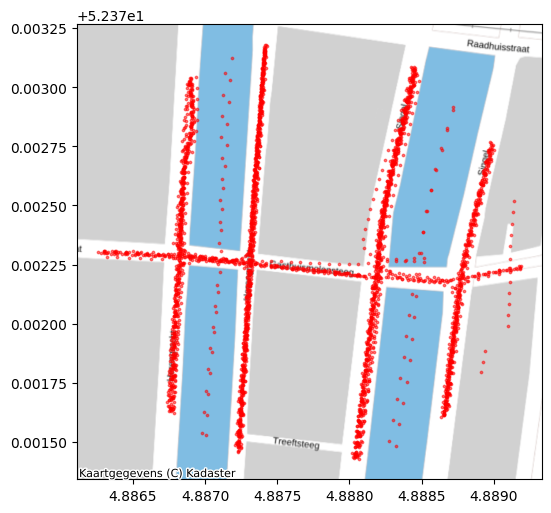

In [29]:
ax = gdf.plot(column='uuid', color='red', markersize=3, figsize=(6, 6), alpha=0.5)
contextily.add_basemap(ax, crs=gdf.crs, source=contextily.providers.nlmaps.standaard)